In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\ryana\Downloads\social_media_engagement1.csv")

In [4]:
df

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


### Little Information

In [25]:
df.columns

Index(['platform', 'post_type', 'post_time', 'likes', 'comments', 'shares',
       'post_day', 'sentiment_score', 'year', 'month', 'day', 'hour', 'minute',
       'sentiment_encoded'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   platform           100 non-null    object        
 1   post_type          100 non-null    object        
 2   post_time          100 non-null    datetime64[ns]
 3   likes              100 non-null    int64         
 4   comments           100 non-null    int64         
 5   shares             100 non-null    int64         
 6   post_day           100 non-null    object        
 7   sentiment_score    100 non-null    object        
 8   year               100 non-null    int32         
 9   month              100 non-null    int32         
 10  day                100 non-null    int32         
 11  hour               100 non-null    int32         
 12  minute             100 non-null    int32         
 13  sentiment_encoded  100 non-null    int64         
dtypes: datetime

In [7]:
df.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [11]:
col = [
    'platform', 'post_type', 'post_day', 'sentiment_score'
]

for cols in col:
    print(f"Unique Column {cols} value:")
    print(df[cols].unique())

Unique Column platform value:
['Facebook' 'Instagram' 'Twitter']
Unique Column post_type value:
['image' 'carousel' 'poll' 'video' 'text']
Unique Column post_day value:
['Thursday' 'Sunday' 'Tuesday' 'Friday' 'Saturday' 'Monday' 'Wednesday']
Unique Column sentiment_score value:
['positive' 'neutral' 'negative']


### Data Clensing

#### Change Data Type

In [12]:
df['post_time'] = pd.to_datetime(df['post_time'])

In [13]:
df.sample()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
96,97,Twitter,video,2023-10-27 23:45:00,314,108,458,Friday,neutral


#### Drop Unused Column

In [14]:
df = df.drop(columns='post_id', axis=1)

In [17]:
df

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,year,month,day,hour,minute
0,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,2023,8,17,14,45
1,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,2023,5,14,0,45
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,2023,2,21,16,15
3,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,2023,11,16,0,45
4,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,2023,5,23,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Instagram,carousel,2023-07-12 17:45:00,36,294,911,Wednesday,positive,2023,7,12,17,45
96,Twitter,video,2023-10-27 23:45:00,314,108,458,Friday,neutral,2023,10,27,23,45
97,Twitter,text,2023-08-05 08:45:00,229,179,38,Saturday,positive,2023,8,5,8,45
98,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive,2023,12,29,12,15


### Add new Column

In [16]:
# Creating New Column and Extract from date
df['year'] = df['post_time'].dt.year
df['month'] = df['post_time'].dt.month
df['day'] = df['post_time'].dt.day
df['hour'] = df['post_time'].dt.hour
df['minute'] = df['post_time'].dt.minute


In [21]:
mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

df['sentiment_encoded'] = df['sentiment_score'].map(mapping)

In [22]:
df

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,year,month,day,hour,minute,sentiment_encoded
0,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,2023,8,17,14,45,1
1,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,2023,5,14,0,45,0
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,2023,2,21,16,15,-1
3,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,2023,11,16,0,45,-1
4,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,2023,5,23,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Instagram,carousel,2023-07-12 17:45:00,36,294,911,Wednesday,positive,2023,7,12,17,45,1
96,Twitter,video,2023-10-27 23:45:00,314,108,458,Friday,neutral,2023,10,27,23,45,0
97,Twitter,text,2023-08-05 08:45:00,229,179,38,Saturday,positive,2023,8,5,8,45,1
98,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive,2023,12,29,12,15,1


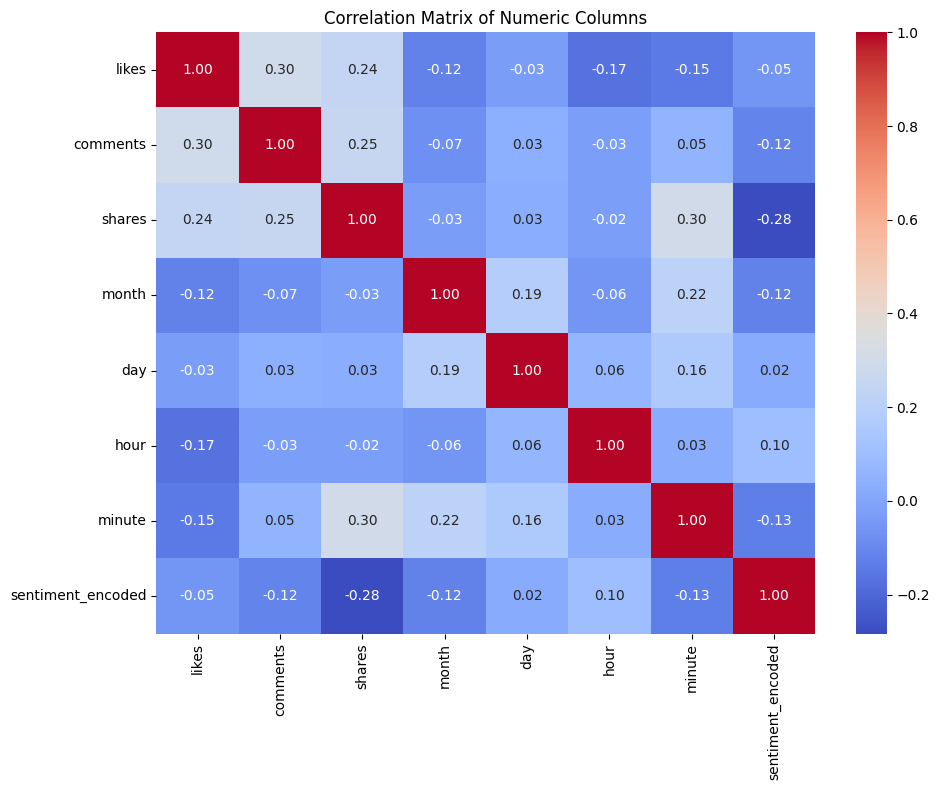

In [27]:
cols_num = [
    'likes', 'comments', 'shares',
    'month', 'day', 
    'hour', 'minute', 'sentiment_encoded'
]

# Ambil hanya kolom numerik
# numeric_df = df.select_dtypes(include=['int32', 'int64', 'float'])
numeric_df = df[cols_num]


# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()